# Codes by  Somya Saraswat, Apoorva Jha, Rajan Verma

## Metrics for evaluating a Machine Learning model

### Code for calculating F1 score

In [22]:
y = [1,1,0,1,0,0,0,1,1,0,1,0,1,1,1] # actual output
ypred = [0,1,1,0,1,1,0,0,1,1,0,1,0,1,1] #predicted output

In [23]:
tp = 0 #true positive
tn = 0 # true negative
fp = 0 # flase positive
fn = 0 # false negative
for i in range(len(y)):
    if y[i] == 1 and ypred[i] == 1: # output is supposed to be true and it predicts true
        tp = tp+1
    elif y[i] == 0 and ypred[i] == 0: # output is supposed to be false and it predicts false
        tn = tn+1
    elif y[i] == 0 and ypred[i] == 1: # output is supposed to be false and it predicts true
        fp = fp+1
    else:# output is supposed to be true and it predicts false
        fn = fn+1

In [24]:
print("The number of True Positives is:",tp)
print("The number of True Negativess is:",tn)
print("The number of False Positives is:",fp)
print("The number of False Negativess is:",fn)

The number of True Positives is: 4
The number of True Negativess is: 1
The number of False Positives is: 5
The number of False Negativess is: 5


In [25]:
accuracy= (tp+tn)/(tp+tn+fp+fn) # the values the model predicts correctly
precision=(tp)/(tp+fp) # Among the values that were predicted to be true how many were actually true
recall = tp/(tp+fn) # Among the true values how many were predicted correctly
specificity = tn/(tn+fp) # Among false values how many were correctly predicted as false
F1score = 2*(recall * precision) / (recall + precision) # harmonic mean of recall and precision

In [26]:
print("Accuracy is:", accuracy)
print("precision is:", precision)
print("recall is:", recall)
print("specificity is:", specificity)
print("F1 score is:", F1score) # higher the score better the model performance

Accuracy is: 0.3333333333333333
precision is: 0.4444444444444444
recall is: 0.4444444444444444
specificity is: 0.16666666666666666
F1 score is: 0.4444444444444444




### Code for calculating AUC-ROC:

The ROC curve is fpr(false postive rate) vs tpr(true positive rate) plots for different threshold values. Where tpr is the recall value as defined above and fpr is 1-specificity. For lower threshold values we get more values defined as true and vice versa. Using these tpr, fpr values for different threshold we plot the ROC. The AUC is the area under this curve.

This basically tells us how well the model is able to classify the classes. Higher the AUC better is the classification.



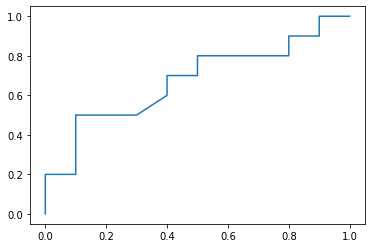

The AUC is:
0.6799999999999999


In [27]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_auc_score

score = np.array([0.9, 0.8, 0.7, 0.6, 0.55, 0.54, 0.53, 0.52, 0.51, 0.505, 0.4, 0.39, 0.38, 0.37, 0.36, 0.35, 0.34, 0.33, 0.30, 0.1])
y = np.array([1,1,0, 1, 1, 1, 0, 0, 1, 0, 1,0, 1, 0, 0, 0, 1 , 0, 1, 0])
#score1=np.array([0,0,1,0,0,0,1,1,0,1,0,1,0,1,1,1,0,1,0,1])
# false positive rate
fpr = []
# true positive rate
tpr = []
# Iterate thresholds from 0.0, 0.01, ... 1.0
thresholds = np.arange(0.0, 1.01, .01)

# get number of positive and negative examples in the dataset
P = sum(y)
N = len(y) - P

# iterate through all thresholds and determine fraction of true positives
# and false positives found at this threshold
for thresh in thresholds:
    FP=0
    TP=0
    for i in range(len(y)):
        if (score[i] > thresh):
            if y[i] == 1:
                TP = TP + 1
            if y[i] == 0:
                FP = FP + 1
    fpr.append(FP/float(N))
    tpr.append(TP/float(P))

plt.plot(fpr,tpr)
plt.show()

print ("The AUC is:")
print(roc_auc_score(y,score)) # We are using sklearn to directly calculate the roc

### Log-Loss Calculataion

The log loss is calculated for classification problems. Higher th evalue better the model performance.


In [28]:


import math #importing Math libraby for logrithmetic value calculation
y = [0.0, 0.0, 1.0, 0.1, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0]     #Actual OUTPUT
y_pred =[0.1, 0.9, 0.9, 0.1, 0.1, 0.9, 0.1, 0.9, 0.9, 0.9] # Predicted OUTPUT
loss = 0
for i in range(len(y)):
    loss=loss+(y[i]*math.log(y_pred[i])+(1-y[i])*math.log(1-y_pred[i]))  #Log_loss calculation function LOSS=(ylog(y_pred)+(1-y)log(1-y_pred))
 
loss = -loss/len(y) #Loss Value

print(loss) #loss value output



0.7865001346320544
